# K Nearest Neighbors Project 

Welcome to the KNN Project! This will be a simple project very similar to the lecture, except you'll be given another data set. Go ahead and just follow the directions below.

## Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [3]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

## Get the Data
** Read the 'KNN_Project_Data csv file into a dataframe **

In [4]:
data = pd.read_csv('KNN_Project_Data')

**Check the head of the dataframe.**

In [5]:
data.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

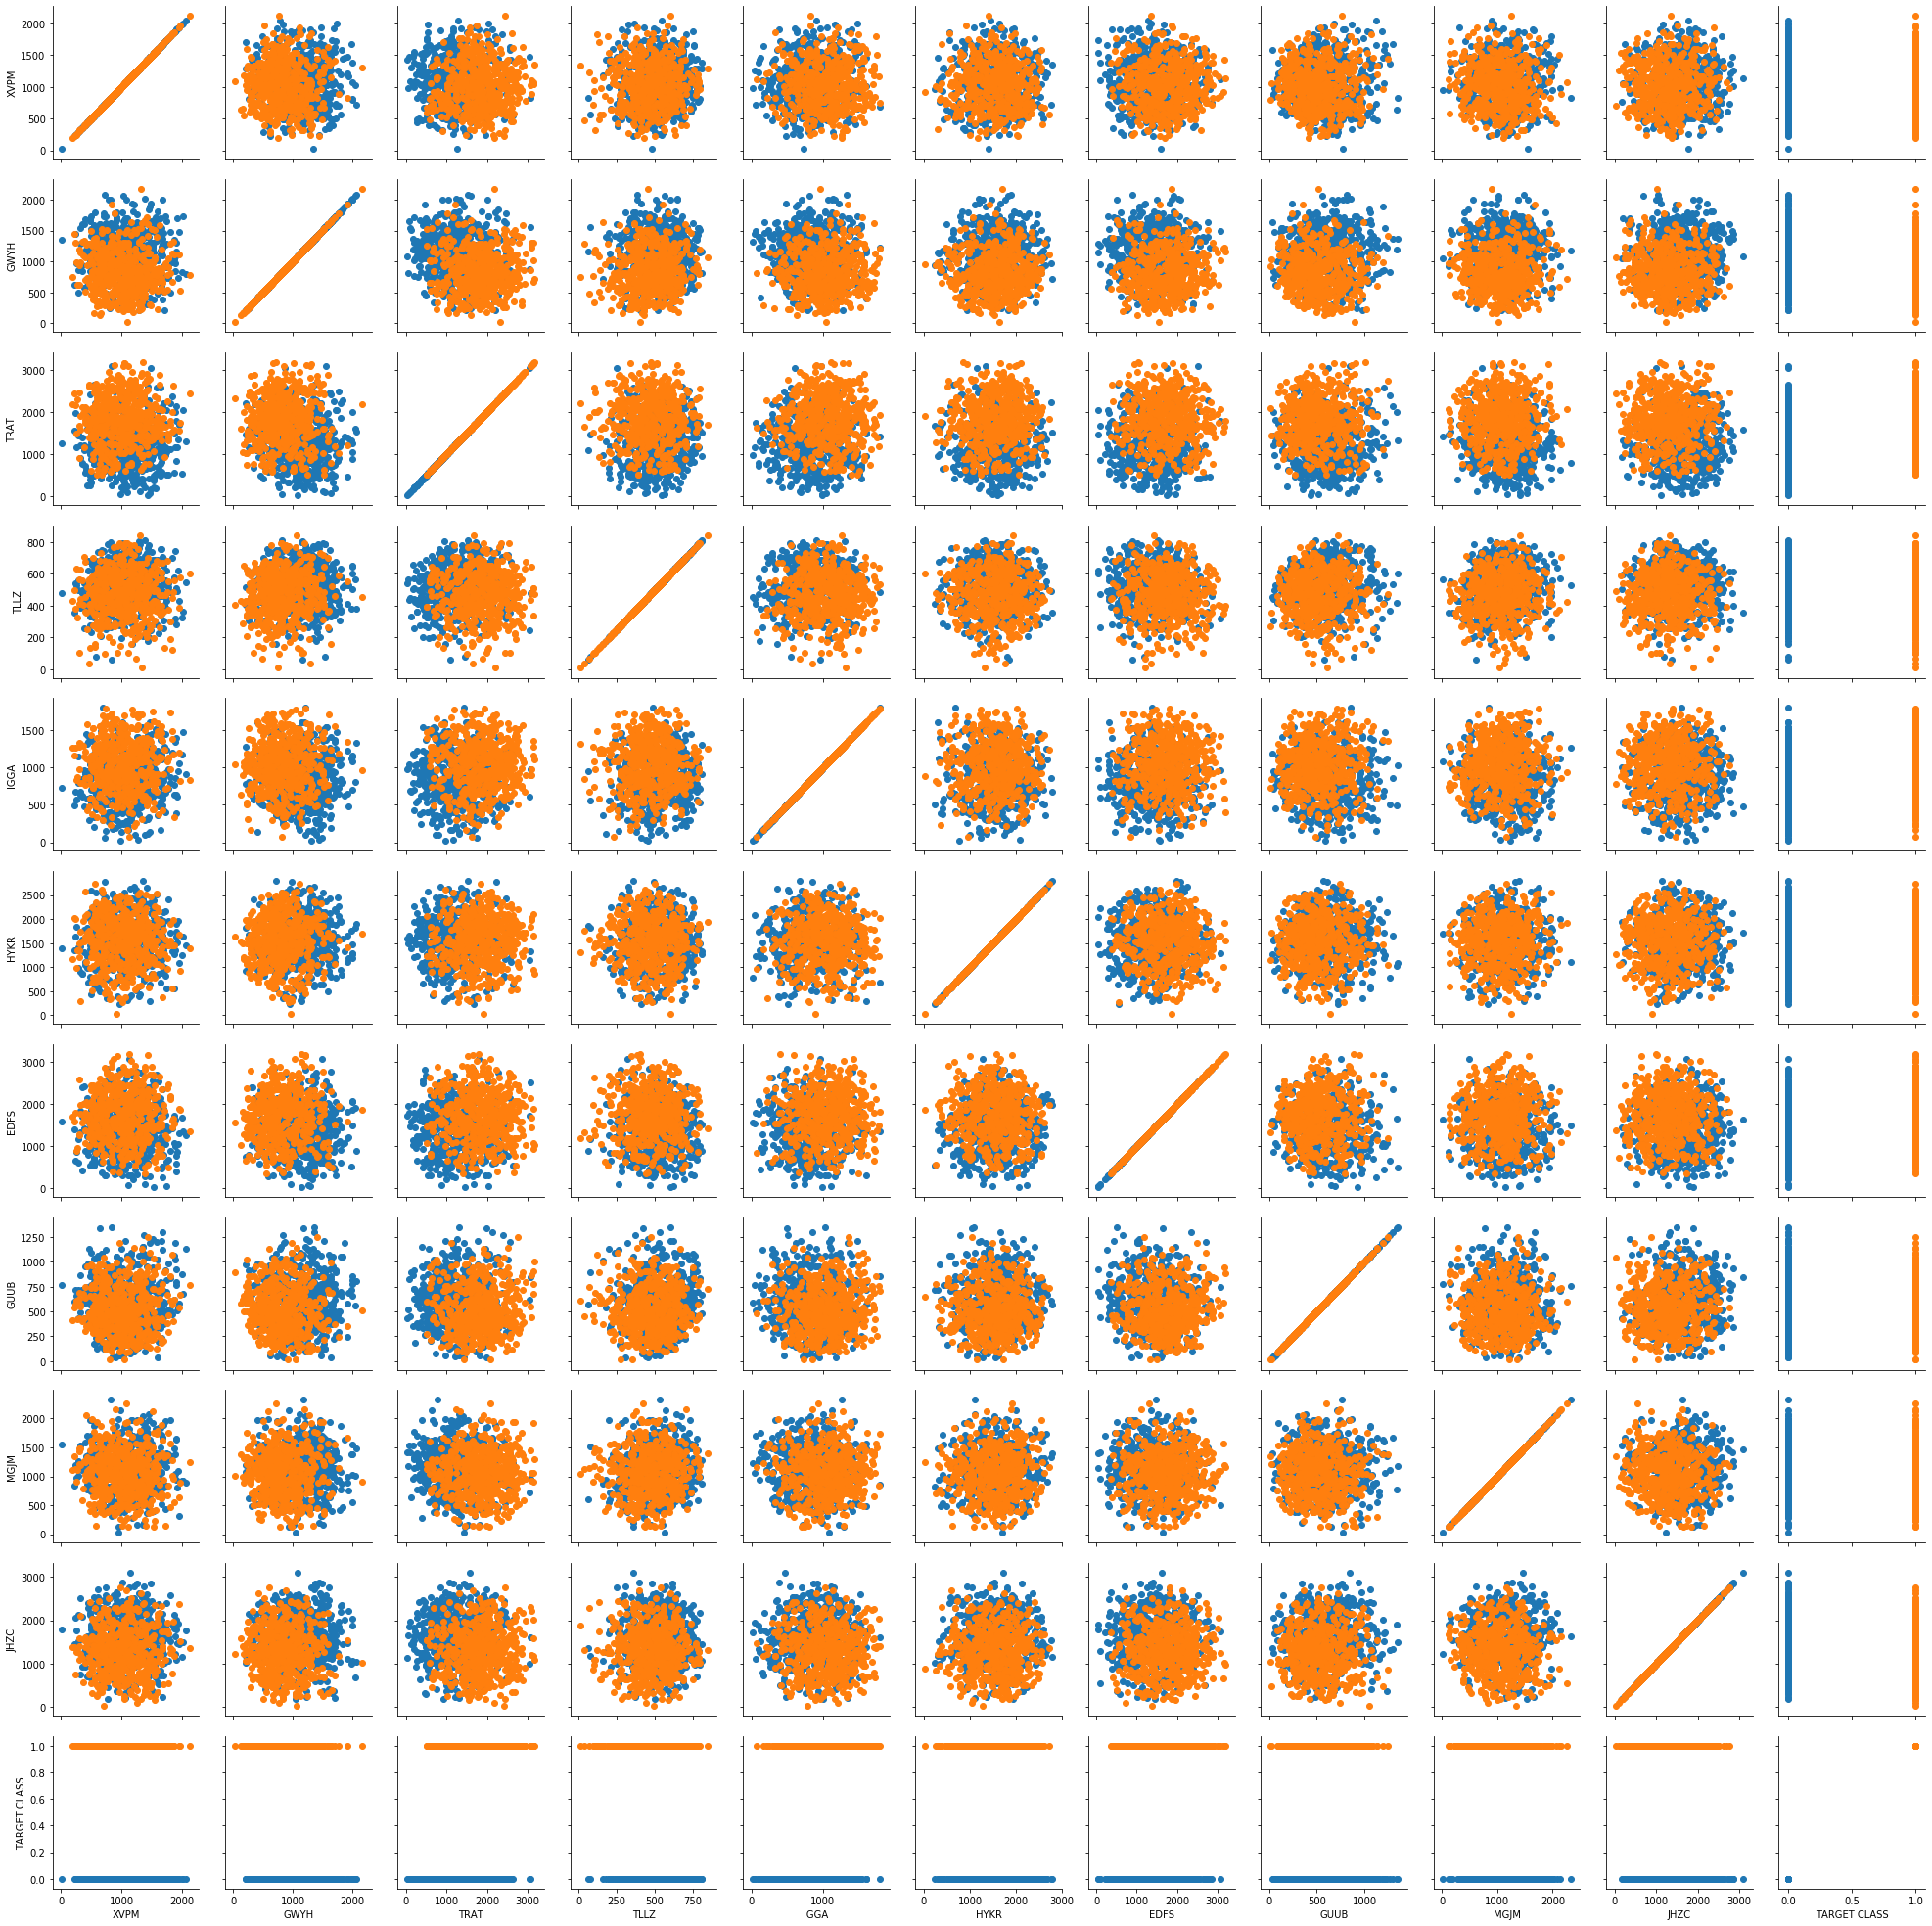

In [6]:
pg = sn.PairGrid(data=data,hue='TARGET CLASS')
pg = pg.map(plt.scatter)

# Standardize the Variables

Time to standardize the variables.

** Import StandardScaler from Scikit learn.**

In [22]:
from sklearn.preprocessing import StandardScaler

** Create a StandardScaler() object called scaler.**

In [38]:
scaler = StandardScaler()

** Fit scaler to the features.**

In [39]:
scaler.fit(data.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

**Use the .transform() method to transform the features to a scaled version.**

In [45]:
tmp = scaler.transform(data.drop('TARGET CLASS',axis=1))

In [46]:
print(tmp)

[[ 1.56852168 -0.44343461  1.61980773 ... -0.93279392  1.00831307
  -1.06962723]
 [-0.11237594 -1.05657361  1.7419175  ... -0.46186435  0.25832069
  -1.04154625]
 [ 0.66064691 -0.43698145  0.77579285 ...  1.14929806  2.1847836
   0.34281129]
 ...
 [-0.35889496 -0.97901454  0.83771499 ... -1.51472604 -0.27512225
   0.86428656]
 [ 0.27507999 -0.99239881  0.0303711  ... -0.03623294  0.43668516
  -0.21245586]
 [ 0.62589594  0.79510909  1.12180047 ... -1.25156478 -0.60352946
  -0.87985868]]


**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [47]:
norm_data = pd.DataFrame(tmp, index=data.index, columns=data.columns[:-1])
norm_data.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [53]:
from sklearn.model_selection import train_test_split

In [72]:
y = data['TARGET CLASS']
x = norm_data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=69)

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [93]:
from sklearn.neighbors import KNeighborsClassifier

**Create a KNN model instance with n_neighbors=1**

In [94]:
model = KNeighborsClassifier(n_neighbors=1)

**Fit this KNN model to the training data.**

In [95]:
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [96]:
print(x_test)

         XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
823 -1.129297 -0.615522  0.208013  1.333985 -0.519638  0.670735 -0.562684   
999  0.625896  0.795109  1.121800  1.185944  0.555582 -1.133032  0.746559   
891 -1.483756  1.080576 -0.998388 -1.830550  1.232563 -0.516553 -0.585544   
781 -0.224853  1.242710  0.858384  0.731557  0.044376  1.582077  1.176598   
967  0.111145 -0.509708  0.532069 -0.965929 -0.279041  0.972977  1.909183   
..        ...       ...       ...       ...       ...       ...       ...   
150  1.395454  0.868603 -0.085382 -1.478970  1.505686  1.940192 -0.079625   
249  1.115071  0.372309  0.422235 -0.931832  0.185092  0.586592  0.359289   
883 -0.685026 -0.190716  0.873572 -1.561937 -0.627258 -0.797386 -0.371970   
746  0.510374  0.453604 -1.551157 -0.409692  0.246955  2.079396  0.798105   
17   1.621722  0.649495 -1.109135  1.850292  0.684260 -0.834929  0.782000   

         GUUB      MGJM      JHZC  
823 -0.316737 -0.084047 -1.381874  
999

In [97]:
y_predict = model.predict(x_test)
print(y_predict)

[1 1 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1
 1 0 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1
 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 0
 0 1 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 0
 1 0 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0
 0 1 0 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1
 0 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 1 1 1 0
 1 0 0 0]


In [98]:
print(y_test)

823    1
999    1
891    0
781    1
967    1
      ..
150    0
249    1
883    1
746    0
17     0
Name: TARGET CLASS, Length: 300, dtype: int64


** Create a confusion matrix and classification report.**

In [99]:
from sklearn.metrics import confusion_matrix,classification_report

In [101]:
confusion_matrix(y_test,y_predict)

array([[107,  40],
       [ 32, 121]])

In [103]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75       147
           1       0.75      0.79      0.77       153

    accuracy                           0.76       300
   macro avg       0.76      0.76      0.76       300
weighted avg       0.76      0.76      0.76       300



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [110]:
import numpy as np
error = [1]
for i in range(1,100):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    error.append(np.mean(y_test != y_pred))

**Now create the following plot using the information from your for loop.**

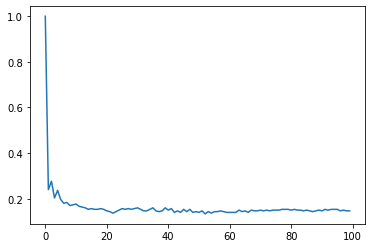

In [111]:
plt.plot(range(0,100),error)

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [119]:
model = KNeighborsClassifier(n_neighbors=30)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [120]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75       147
           1       0.75      0.79      0.77       153

    accuracy                           0.76       300
   macro avg       0.76      0.76      0.76       300
weighted avg       0.76      0.76      0.76       300



# Great Job!